<b>Objective:- "Spam Classification"</b><br>
To build the models for classifying the SMS into spam or ham through the text of the SMS using standard classifiers.
    

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Data </b>

In [99]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<b>Data Overview</b>

In [100]:
data['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [101]:
data.describe()

,class,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [102]:
data.groupby('class').describe()

SMS                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [103]:
data['length']=data['SMS'].apply(len)
data.head()

,class,SMS,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<b>EDA</b>

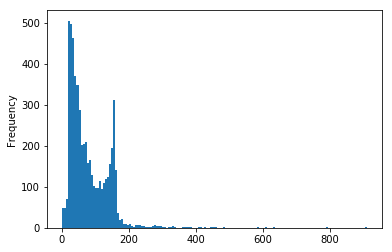

In [104]:
data['length'].plot.hist(bins=150)

count for ham message 4825
count for spam message 747


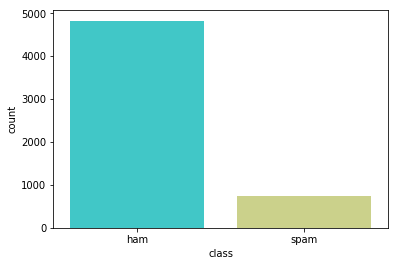

In [105]:
print('count for ham message %s'%(data[data['class']=='ham'].shape[0]))
print('count for spam message {x}'.format(x=data[data['class']=='spam'].shape[0]))
sns.countplot(x='class',data=data,palette='rainbow')

On avg the length of spam is greater than ham messsages.There are some outlier in ham message


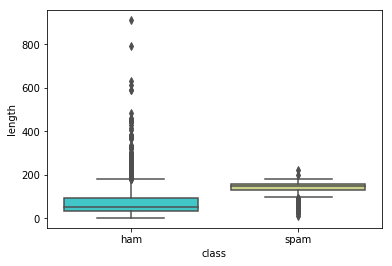

In [106]:
print('On avg the length of spam is greater than ham messsages.There are some outlier in ham message')
sns.boxplot(x='class',y='length',data=data,palette='rainbow')


In [107]:
data['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7dff0a3f60>,
      dtype=object)

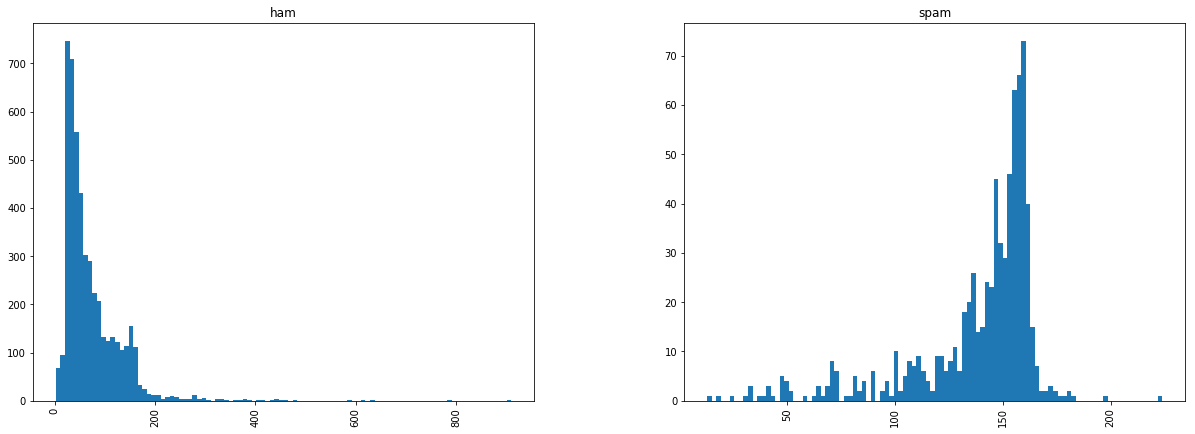

In [108]:
data.hist(column='length',by='class',bins=100,figsize=(20,7))

In [109]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<b>Check For duplicate, missing values</b>

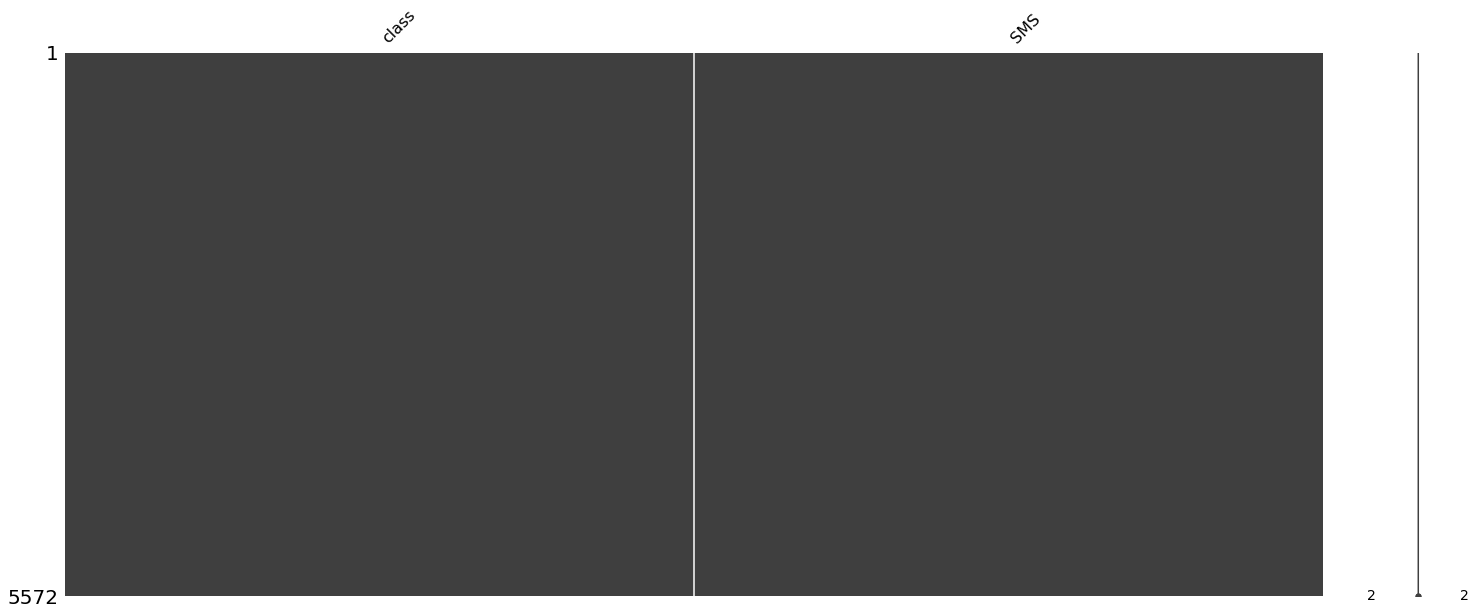

In [110]:
import missingno as msno
msno.matrix(df)

In [111]:
df.describe()

,class,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


<b>Observation:- </b>
There is no missing value in the data.

In [112]:
df['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [113]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
5542    False
5543    False
5544    False
5545    False
5546    False
5547    False
5548    False
5549    False
5550    False
5551    False
5552    False
5553     True
5554    False
5555    False
5556    False
5557    False
5558     True
5559    False
5560    False
5561    False
5562    False
5563    False
5564    False
5565    False
5566    False
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [114]:
x = df.duplicated()
type(x)

pandas.core.series.Series

In [115]:
x.value_counts()

False    5169
True      403
dtype: int64

In [116]:
df.loc[df.duplicated(), :]

,class,SMS
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
338,ham,"Sorry, I'll call later"
356,spam,Congratulations ur awarded 500 of CD vouchers ...
443,ham,"Sorry, I'll call later"
532,ham,Gudnite....tc...practice going on
654,ham,Did u got that persons story


In [117]:
new_df = df.drop_duplicates()

In [118]:
new_df.describe()

,class,SMS
count,5169,5169
unique,2,5169
top,ham,"Hi, Mobile no. &lt;#&gt; has added you in th..."
freq,4516,1


In [119]:
new_df['class'].value_counts()

ham     4516
spam     653
Name: class, dtype: int64

<b>wordcloud</b>

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [122]:
df['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [123]:
ham_df = df[df['class'] == 'ham']
spam_df = df[df['class'] == 'spam']
print(ham_df.shape)
print(spam_df.shape)

(4825, 2)
(747, 2)


In [124]:
from sklearn.feature_extraction.text import CountVectorizer
ham_vect = CountVectorizer(stop_words='english')
spam_vect = CountVectorizer(stop_words='english')
ham_dtm = ham_vect.fit_transform(ham_df['SMS'])
spam_dtm = spam_vect.fit_transform(spam_df['SMS'])

In [125]:
ham_word = ham_vect.get_feature_names()
ham_freqs = ham_dtm.sum(axis=0).A1
ham_result = dict(zip(ham_word, ham_freqs))

In [126]:
print(len(ham_word))

6589


In [127]:
spam_word = spam_vect.get_feature_names()
spam_freqs = spam_dtm.sum(axis=0).A1
spam_result = dict(zip(spam_word, spam_freqs))

In [128]:
print(len(spam_word))

2699


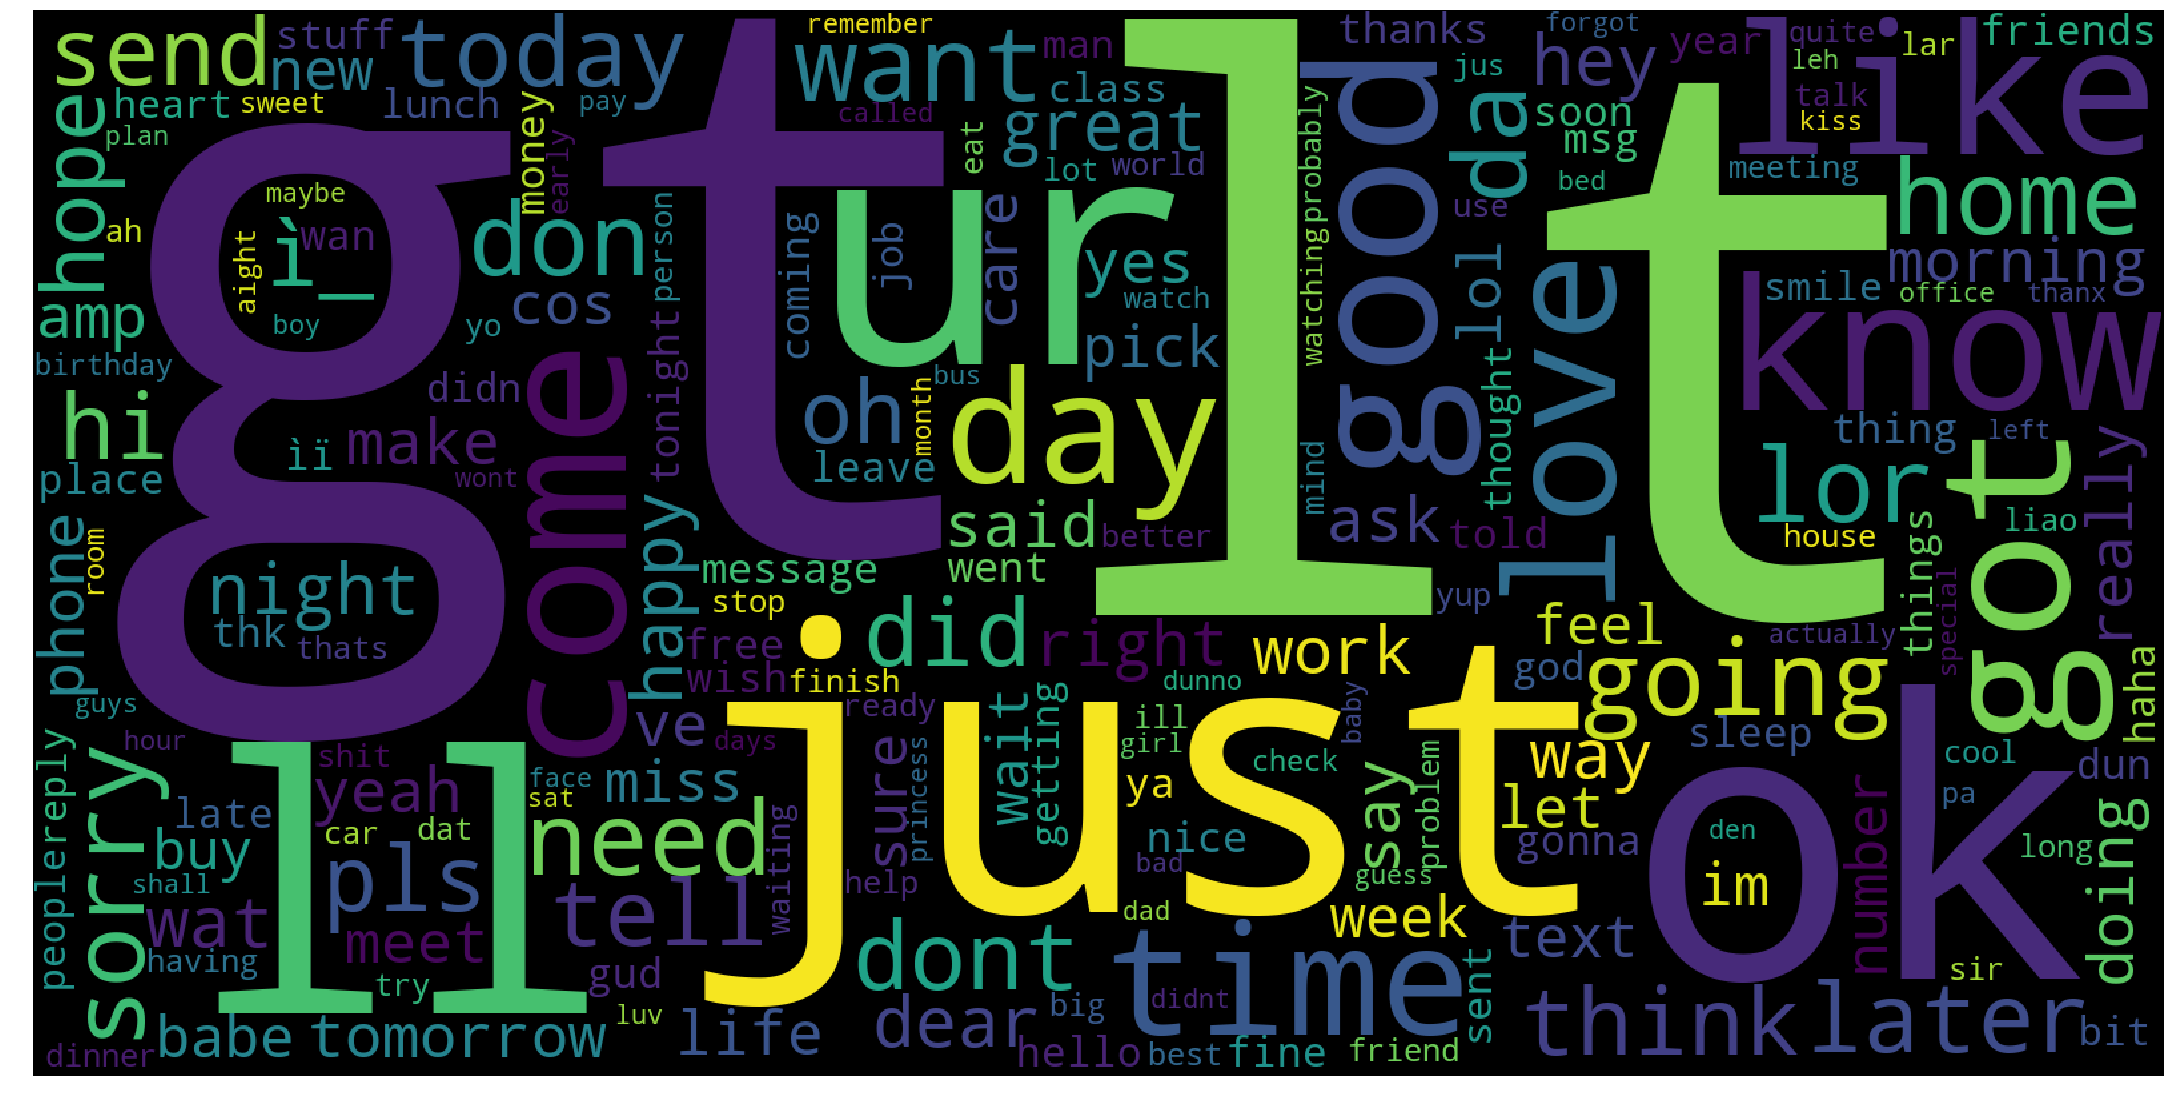

In [129]:
from wordcloud import WordCloud

#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(ham_result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("ham_word_cloud.png")
plt.show()

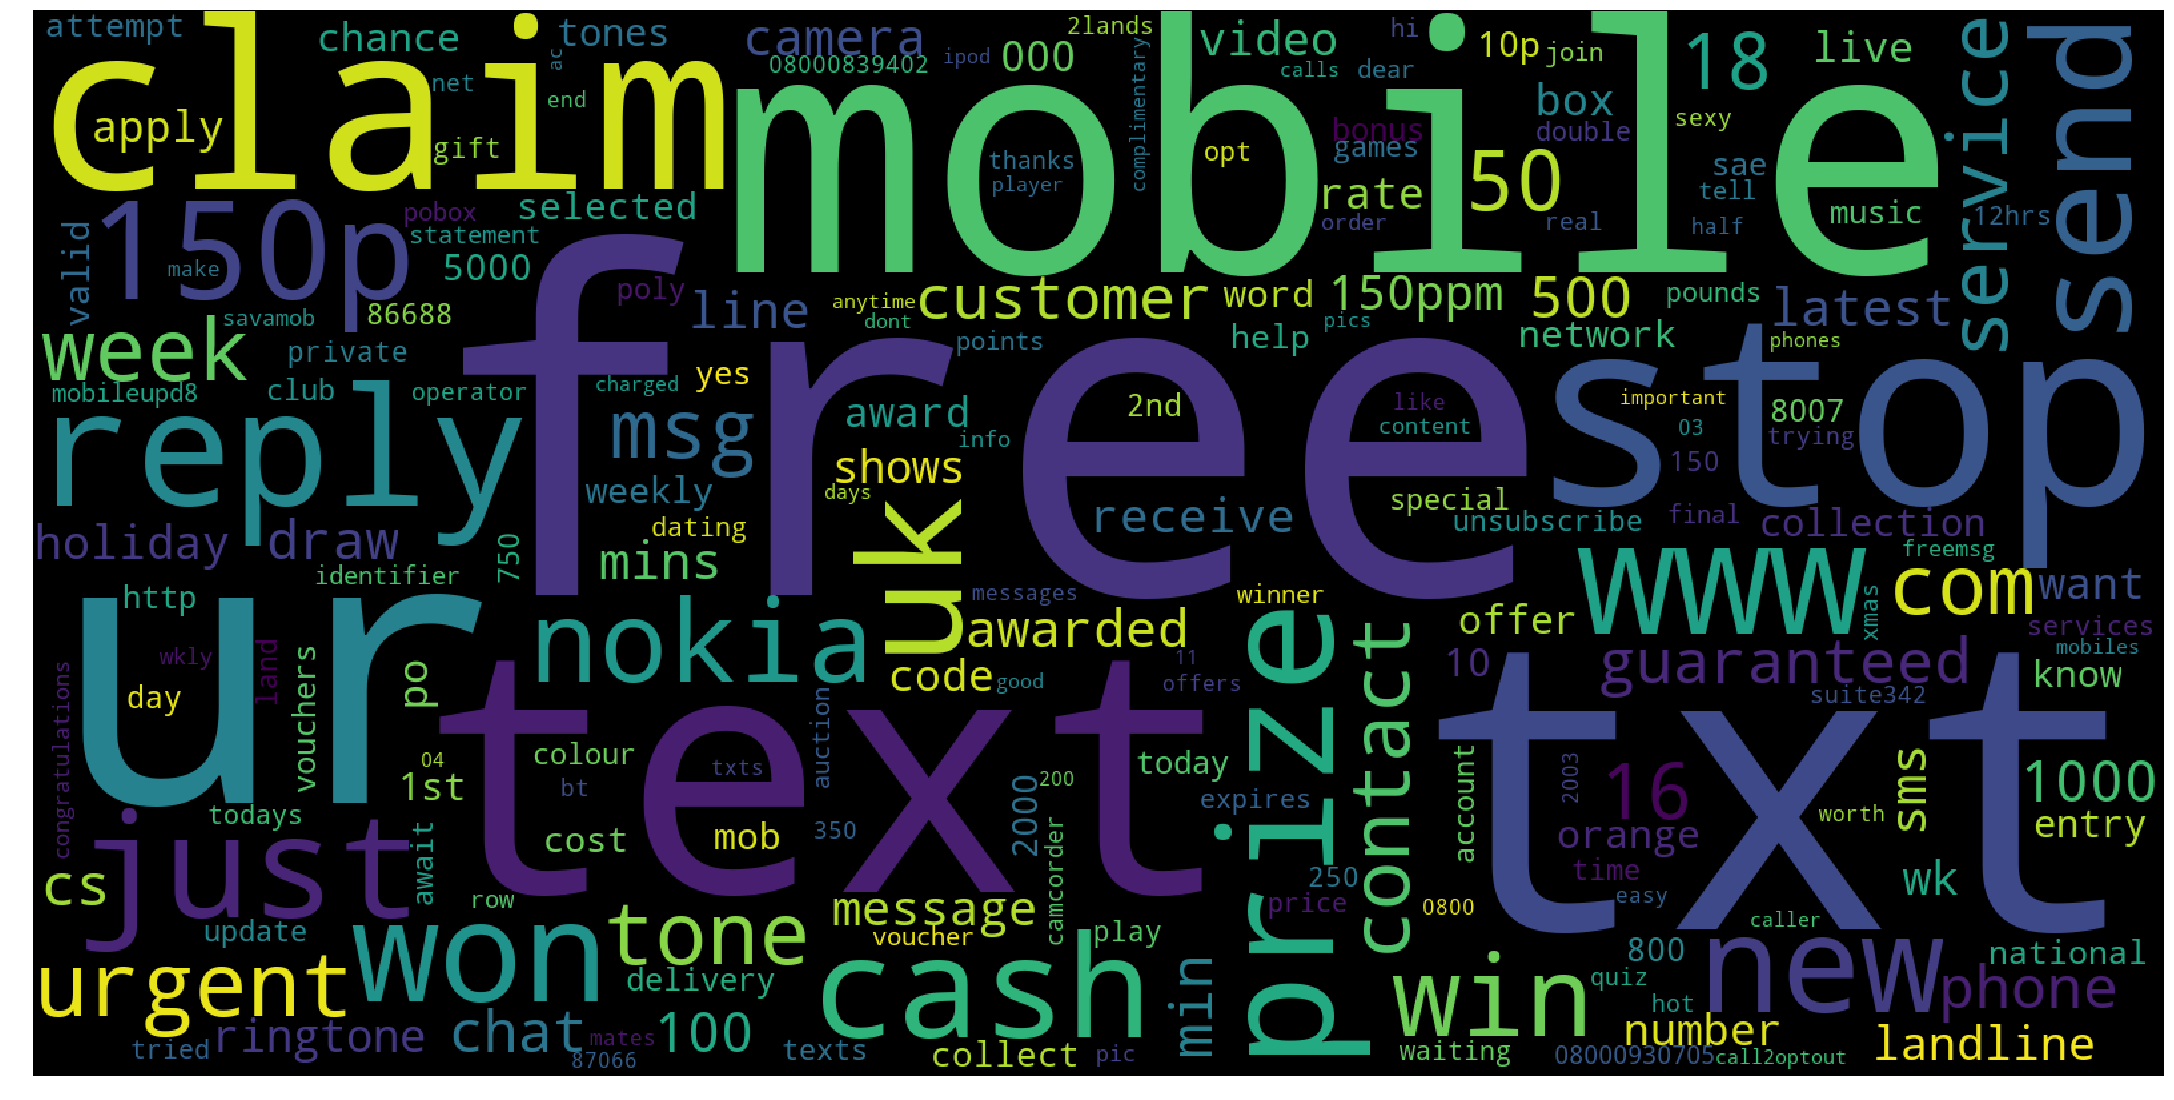

In [130]:
from wordcloud import WordCloud

#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(spam_result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("spam_word_cloud.png")
plt.show()

In [131]:
import pandas as pd
data = pd.read_csv('spam.csv', encoding='latin1')
data.head()

,class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [132]:
data = data.rename(columns={"class":"label", "SMS":"text"})

In [133]:
data.tail()

,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [134]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [135]:
data['label_num'] = data.label.map({'ham':0, 'spam':1})

In [136]:
data.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<b>stratified shuffle split </b>

In [137]:
from sklearn.model_selection import StratifiedShuffleSplit

<b>Extracting the text and the target class from the text file </b>

In [138]:
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2,train_size=0.8, random_state=0)
X = data['text']
y = data['label']
sss.get_n_splits(X, y)

3

In [139]:
print(sss) 

StratifiedShuffleSplit(n_splits=3, random_state=0, test_size=0.2,
            train_size=0.8)


In [140]:
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1257 5461 1612 ...  245 1235 3361] TEST: [2461  461 2628 ... 3681 2896 3100]
TRAIN: [2113 2574 4875 ...  966 4025  540] TEST: [3523 3947  634 ... 2931 4038 3856]
TRAIN: [1423 2467 4231 ... 4785 3179  797] TEST: [4037  911 2432 ... 4909 5141  571]


In [141]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


<b>TF-IDF vectorizer</b>

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [143]:
vect = TfidfVectorizer()

In [144]:
train_dtm = vect.fit_transform(X_train)

In [145]:
test_dtm = vect.transform(X_test)

In [146]:
type(train_dtm)

scipy.sparse.csr.csr_matrix

<b>KNN</b>

In [147]:
prediction = dict()
pred_scores = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model = KNeighborsClassifier(n_neighbors=49)
model.fit(train_dtm,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=49, p=2,
           weights='uniform')

In [148]:
prediction["knn"] = model.predict(test_dtm)

In [149]:
accuracy_score(y_test,prediction["knn"])

0.9641255605381166

In [150]:
print("Confusion Matrix:\n",confusion_matrix(y_test, prediction["knn"]))

Confusion Matrix:
 [[966   0]
 [ 40 109]]


In [151]:
pred_scores.append(('KNN',[accuracy_score(y_test,prediction["knn"])]))

<b>Logistic Regression</b>

In [152]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_dtm,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [153]:
prediction["Logistic"] = model.predict(test_dtm)

In [154]:
accuracy_score(y_test,prediction["Logistic"])

0.9757847533632287

In [155]:
print("Confusion Matrix:\n",confusion_matrix(y_test, prediction["Logistic"]))

Confusion Matrix:
 [[963   3]
 [ 24 125]]


In [156]:
print(classification_report(y_test, prediction['Logistic'], target_names = ["Ham", "Spam"]))


             precision    recall  f1-score   support

        Ham       0.98      1.00      0.99       966
       Spam       0.98      0.84      0.90       149

avg / total       0.98      0.98      0.97      1115



In [157]:
print(prediction)

{'knn': array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object), 'Logistic': array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)}


In [158]:
pred_scores.append(('LR',[accuracy_score(y_test,prediction["Logistic"])]))

In [159]:
print(pred_scores)

[('KNN', [0.9641255605381166]), ('LR', [0.9757847533632287])]


In [160]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df

/home/dheeraj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score
KNN,0.964126
LR,0.975785


<b>SVM</b>

In [161]:
from sklearn.svm import SVC
model = SVC(kernel='sigmoid', gamma=1.0)
model.fit(train_dtm,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [162]:
prediction["SVM"] = model.predict(test_dtm)

In [163]:
accuracy_score(y_test,prediction["SVM"])

0.989237668161435

In [164]:
print("Confusion Matrix:\n",confusion_matrix(y_test, prediction["SVM"]))

Confusion Matrix:
 [[964   2]
 [ 10 139]]


In [165]:
pred_scores.append(('SVM',[accuracy_score(y_test,prediction["SVM"])]))

In [166]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df

/home/dheeraj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score
KNN,0.964126
LR,0.975785
SVM,0.989238


<b>NaiveBayes</b>

In [167]:
from sklearn.naive_bayes import MultinomialNB

In [168]:
model = MultinomialNB(alpha=0.2)

In [169]:
model.fit(train_dtm,y_train)


MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

In [170]:
prediction["NaiveBayes"] = model.predict(test_dtm)

In [171]:
accuracy_score(y_test,prediction["NaiveBayes"])

0.989237668161435

In [172]:
print("Confusion Matrix:\n",confusion_matrix(y_test, prediction["NaiveBayes"]))

Confusion Matrix:
 [[964   2]
 [ 10 139]]


In [173]:
pred_scores.append(('NaiveBayes',[accuracy_score(y_test,prediction["NaiveBayes"])]))

In [174]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df

/home/dheeraj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score
KNN,0.964126
LR,0.975785
SVM,0.989238
NaiveBayes,0.989238


<b>DecisionTreeClassifier</b>

In [175]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
model = DecisionTreeClassifier(min_samples_split=7, random_state=111)
model.fit(train_dtm,y_train)
prediction["DecisionTree"] = model.predict(test_dtm)

In [177]:
accuracy_score(y_test,prediction["DecisionTree"])

0.9587443946188341

In [178]:
print("Confusion Matrix:\n",confusion_matrix(y_test, prediction["DecisionTree"]))

Confusion Matrix:
 [[943  23]
 [ 23 126]]


In [179]:
pred_scores.append(('DecisionTree',[accuracy_score(y_test,prediction["DecisionTree"])]))

In [180]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df

/home/dheeraj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score
KNN,0.964126
LR,0.975785
SVM,0.989238
NaiveBayes,0.989238
DecisionTree,0.958744


<b>Comparision</b>

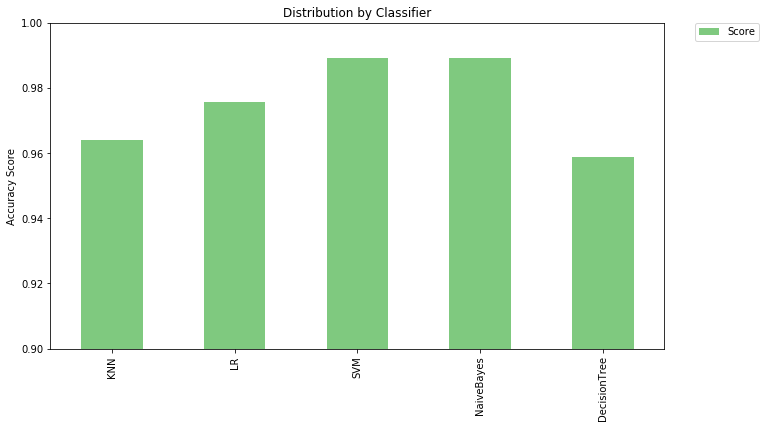

In [181]:
import matplotlib.pyplot as plt
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<b>Conclusion</b><br>
The best model I have found is support vector machine and Naive Bayes machine with 98.9% accuracy.<br>
It classifies every non-spam message correctly (Model precision).<br>
Second best model is LR which gives the accuracy of 97.5%.  

